<a href="https://colab.research.google.com/github/m-bashari-m/sample-DNN-projects/blob/main/1.2_FMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST classification

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Fetch data

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Number of classes

In [3]:
n_classes = np.max(train_labels) + 1
n_classes

10

## Plot some images

In [4]:
def plot_image(images, n_row, n_col):
  index = 1
  plt.figure(figsize=(10, 5))
  for _ in range(n_row):
    for _ in range(n_col):
      plt.subplot(n_row, n_col, index)
      plt.imshow(images[index-1], cmap='binary')
      plt.axis('off')
      index += 1

  plt.show()

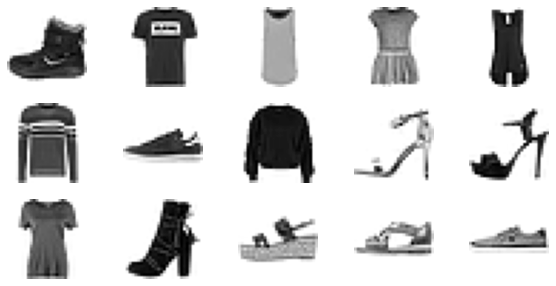

In [5]:
n_images = 20
n_row = 3
n_col = 5
plot_image(train_images[:n_images], n_row, n_col)

## Preparing data

In [6]:
train_images = train_images.astype(np.float32) / 255
test_images = test_images.astype(np.float32) / 255.


In [7]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

## Creating model

In [8]:
list(train_images.shape[1:])

[28, 28]

In [9]:
def make_model():
  model = Sequential([
              Flatten(input_shape=list(train_images.shape[1:])),
              Dense(200, activation='relu'),
              Dense(100, activation='relu'),
              Dense(10, activation='softmax')])
  
  model.compile(optimizer='sgd',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [13]:
model = make_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 200)               157000    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=30, validation_split=.2)

Epoch 1/30
1500/1500 [==============================] - 18s 9ms/step - loss: 0.7566 - accuracy: 0.7514 - val_loss: 0.5403 - val_accuracy: 0.8114
Epoch 2/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.5006 - accuracy: 0.8275 - val_loss: 0.4676 - val_accuracy: 0.8372
Epoch 3/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4509 - accuracy: 0.8433 - val_loss: 0.4601 - val_accuracy: 0.8397
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4220 - accuracy: 0.8535 - val_loss: 0.4238 - val_accuracy: 0.8503
Epoch 5/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4022 - accuracy: 0.8605 - val_loss: 0.4040 - val_accuracy: 0.8580
Epoch 6/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3859 - accuracy: 0.8658 - val_loss: 0.3987 - val_accuracy: 0.8604
Epoch 7/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3722 - accuracy: 0.8690 - val_loss: 0.3758 - val_accuracy

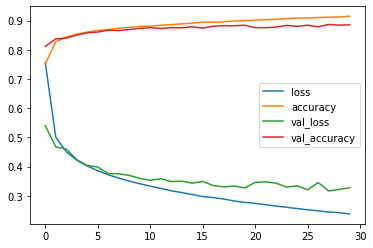

In [12]:
pd.DataFrame(history.history).plot()